## Zad 1

In [1]:
import numpy as np

def create_random_matrix(
        m: int, 
        n: int, 
        mean: float = 0.0,
        std: float = 1.0
    ) -> np.ndarray:

    return np.random.randn(m, n) * std + mean

In [2]:
A = create_random_matrix(3, 3)
print(A)

[[ 0.191566    0.6062413  -0.15339422]
 [ 1.47191493  0.94690597  0.93860827]
 [ 1.1206034   1.95170653  1.32117029]]


In [3]:
from typing import Tuple, Optional

def vector_norm(vec: np.ndarray, ord: int) -> float:
    if ord <= 0:
        return np.max(np.abs(vec)).item()
    norm_value = (np.abs(vec) ** ord).sum() ** (1 / ord)
    return norm_value.item()


def power_method(
        mat: np.ndarray, 
        norm: int = 2, 
        tol: float = 1e-10,
        max_iter: int = 1000,
        x0: Optional[np.ndarray] = None
    ) -> Tuple[np.ndarray, float, list[float]]:

    assert len(mat.shape) == 2, "Input matrix should be two-dimensional"
    assert mat.shape[0] == mat.shape[1], "Input matrix should be squared"

    error = float("inf")
    iter_counter = 0

    x = x0 if x0 is not None else np.random.uniform(low=0, high=1, size=mat.shape[0])
    errors = []

    while error > tol and iter_counter < max_iter:
        x /= vector_norm(x, norm)

        y = mat @ x
        m = ((mat @ x) @ x.T) / (x @ x.T)

        error = vector_norm(y - m * x, norm)
        errors.append(error)

        x = y
        iter_counter += 1

    eigenvalue = ((mat @ y) @ y.T) / (x @ x.T)
    return x, eigenvalue.item(), errors

In [4]:
eigenvector, eigenvalue, errors = power_method(A)
assert vector_norm(A @ eigenvector - eigenvalue * eigenvector, 2) < 1e-9, "Eigenvalue equation is not satisfied"

print(eigenvector)
print(eigenvalue)

[0.20764571 1.41000124 2.23903963]
2.6541512225591153


## Zad 2

In [5]:
def udf_decomposition(mat: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    eigenvalues, eigenvectors = np.linalg.eig(mat @ mat.T)
    U = eigenvectors
    D = np.diag(eigenvalues)
    V = A.T @ U @ np.diag(1 / eigenvalues)
    return U, D, V

In [6]:
U, D, V = udf_decomposition(A)
assert np.allclose(U @ D @ V.T,  A), "Matrix decomposition is not satisfied"

print(U)
print(D)
print(V)

[[-0.13594267 -0.87593301  0.46288331]
 [-0.58895476 -0.30424803 -0.74870917]
 [-0.79665041  0.37439885  0.47452462]]
[[10.51679378  0.          0.        ]
 [ 0.          0.16420982  0.        ]
 [ 0.          0.          0.5013035 ]]
[[-0.16979153 -1.19404292 -0.96071462]
 [-0.20870683 -0.53836218  0.99300045]
 [-0.15065959  2.09145817 -0.29287729]]


## Zad 3

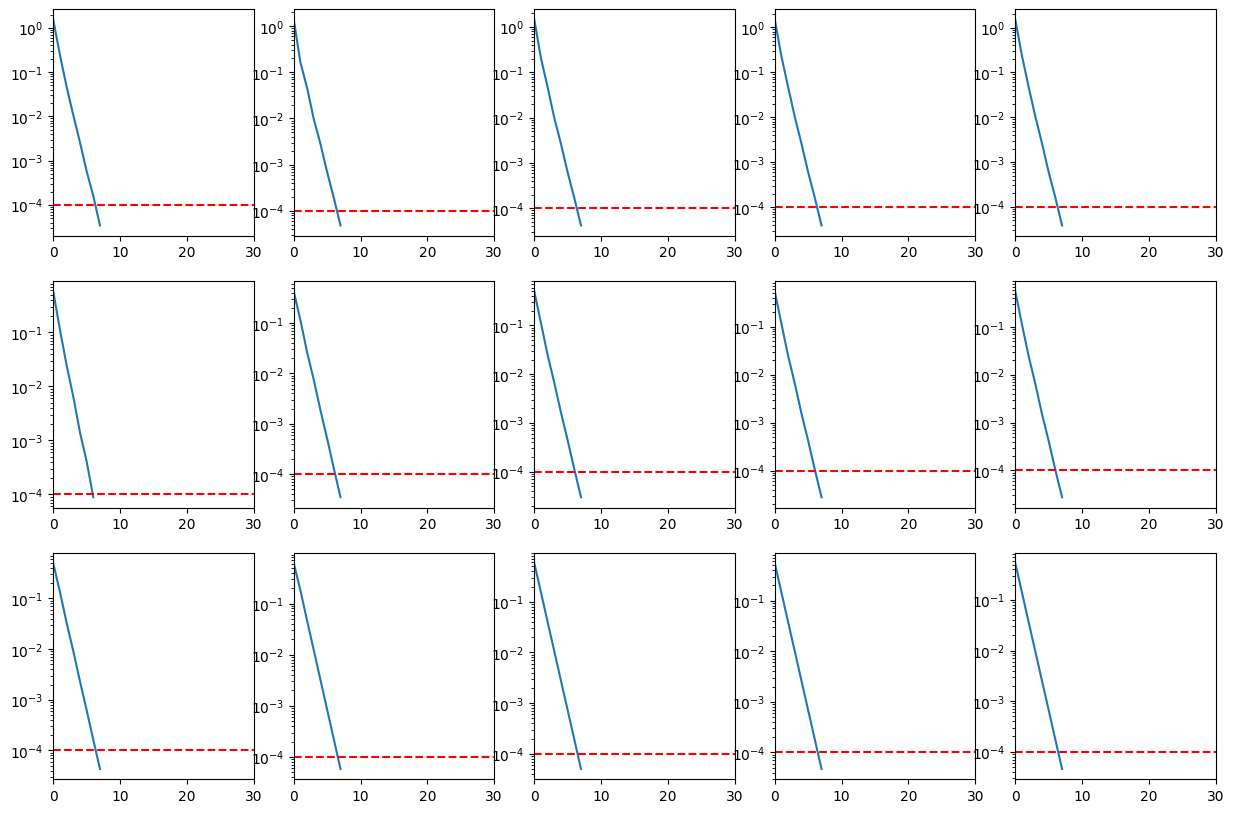

In [7]:
import matplotlib.pyplot as plt

vectors = np.random.uniform(low=0, high=1, size=(3, 3))
norms = [-1, 1, 2, 3, 4]

fig, axes = plt.subplots(3, 5, figsize=(15, 10))

for i, starting_vector in enumerate(vectors):
    for j, norm in enumerate(norms):
        eigenvector, eigenvalue, errors = power_method(
            A, norm, tol=1e-4, max_iter=1000, x0=starting_vector
        )

        ax = axes[i][j]
        ax.plot(errors)
        ax.set_xlim(0, 30)
        ax.semilogy()
        ax.axhline(1e-4, color="red", linestyle="--")

plt.show()

## Zad 4

In [8]:
matrix_size_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

svd_A_diffs = []
udv_A_diffs = []
udv_svd_diffs = []

for matrix_size in matrix_size_list:
    A = create_random_matrix(matrix_size, matrix_size)

    s, v, d = np.linalg.svd(A)
    U, D, V = udf_decomposition(A)

    svd_reconstructed = s @ np.diag(v) @ d
    udv_reconstructed = U @ D @ V.T

    svd_A_diffs.append(np.linalg.norm(svd_reconstructed - A, 2).item())
    udv_A_diffs.append(np.linalg.norm(udv_reconstructed - A, 2).item())
    udv_svd_diffs.append(np.linalg.norm(svd_reconstructed - udv_reconstructed, 2).item())

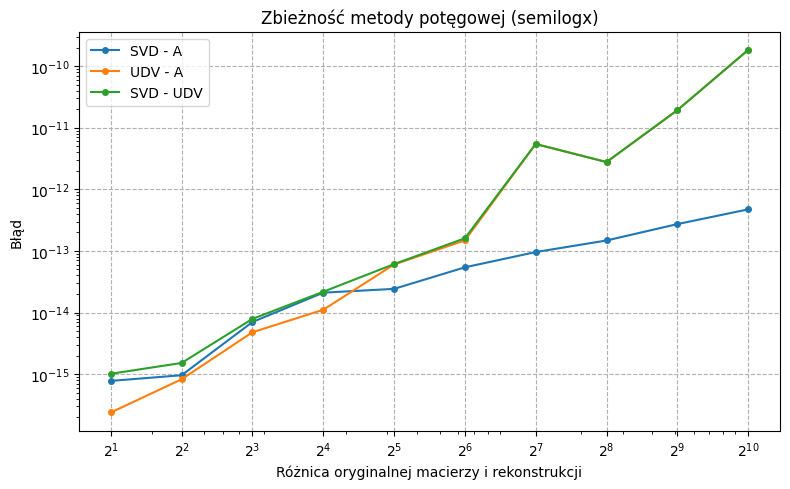

In [17]:
plt.figure(figsize=(8, 5))


plt.semilogx(matrix_size_list, svd_A_diffs, marker='o', markersize=4, label="SVD - A")
plt.semilogx(matrix_size_list, udv_A_diffs, marker='o', markersize=4, label="UDV - A")
plt.semilogx(matrix_size_list, udv_svd_diffs, marker='o', markersize=4, label="SVD - UDV")
plt.semilogy()

labels = [f'$2^{{{i}}}$' for i in range(1, len(matrix_size_list) + 1)]

plt.xticks(matrix_size_list, labels)
plt.legend()


plt.xlabel("Różnica oryginalnej macierzy i rekonstrukcji")
plt.ylabel("Błąd")

plt.title("Zbieżność metody potęgowej (semilogx)")
plt.grid(True, which="major", ls="--")
plt.tight_layout()
plt.show()